In [ ]:
#for ET
import xarray as xr
import numpy as np

# Load the NetCDF file
ds = xr.open_dataset("/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Tehran_updated.nc")

# Assume 'ET' is the variable for Effective Temperature
et_data = ds['ET']

# Create a list of the months to analyze
months = [5, 6, 7, 8, 9]

# Function to check for consecutive hours
def count_consecutive_hours(arr, threshold=8):
    count = 0
    for value in arr:
        if value:
            count += 1
        else:
            count = 0
        
        if count >= threshold:
            return True
    return False

# Initialize total days counter
total_valid_days = 0

# Loop over each month
for month in months:
    # Create a boolean mask for the current month
    month_mask = et_data['time.month'] == month
    filtered_data = et_data.sel(time=month_mask)

    # Create a boolean array for hours where ET > 23°C
    et_above_23 = filtered_data > 23

    # Count valid days for the current month
    valid_days_count = 0
    for day in et_above_23.groupby('time.day'):
        if count_consecutive_hours(day[1].values):
            valid_days_count += 1

    # Add the valid days for this month to the total
    total_valid_days += valid_days_count
    
    average_days = total_valid_days/5
    

print(f"Total number of days from May to September with ET > 23°C for more than 8 consecutive hours: {average_days}")


In [ ]:
#for WBGT WITH MANY NC FILES
import xarray as xr
import numpy as np
import os

# List of .nc files to process (add your actual file paths)
nc_files = [
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/AbuDhabi_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Aman_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Ankara_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Athens_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Baghdad_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1996/Beirut_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1998/Cairo_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Damascus_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1984/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1995/Istanbul_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Jerusalem_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1995/kuwait_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Manama_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Mascat_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2021/Nicosia_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Riyadh_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1981/Sanaa_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Tehran_updated.nc"
]

# Function to check for consecutive hours
def count_consecutive_hours(arr, threshold=8):
    count = 0
    for value in arr:
        if value:
            count += 1
        else:
            count = 0
        
        if count >= threshold:
            return True
    return False

# Months to analyze
months = [5, 6, 7, 8, 9]

# Loop through each .nc file
for nc_file in nc_files:
    print(f"Processing file: {os.path.basename(nc_file)}")
    
    # Load the NetCDF file
    ds = xr.open_dataset(nc_file)

    # Assume 'ET' is the variable for Effective Temperature
    et_data = ds['WBGT']

    # Initialize total days counter for the current file
    total_valid_days = 0

    # Loop over each month
    for month in months:
        # Create a boolean mask for the current month
        month_mask = et_data['time.month'] == month
        filtered_data = et_data.sel(time=month_mask)

        # Create a boolean array for hours where ET > 23°C
        et_above_23 = filtered_data > 24

        # Count valid days for the current month
        valid_days_count = 0
        for day in et_above_23.groupby('time.day'):
            if count_consecutive_hours(day[1].values):
                valid_days_count += 1

        # Add the valid days for this month to the total
        total_valid_days += valid_days_count
        average_days = total_valid_days/5

    print(f"Total number of days in {os.path.basename(nc_file)} with WBGT > 24°C for more than 8 consecutive hours: {average_days}")


In [ ]:
#for ET WITH MANY NC FILES
import xarray as xr
import numpy as np
import os

# List of .nc files to process (add your actual file paths)
nc_files = [
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2013/Riyadh_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2010/Istanbul_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2012/Istanbul_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1991/AbuDhabi_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2020/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2021/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2022/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2023/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2013/Riyadh_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2010/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2008/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2009/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2010/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2011/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2012/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2013/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2014/Doha_updated.nc",
    "/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/2015/Doha_updated.nc"
]

# Function to check for consecutive hours
def count_consecutive_hours(arr, threshold=8):
    count = 0
    for value in arr:
        if value:
            count += 1
        else:
            count = 0
        
        if count >= threshold:
            return True
    return False

# Months to analyze
months = [5, 6, 7, 8, 9]

# Loop through each .nc file
for nc_file in nc_files:
    print(f"Processing file: {os.path.basename(nc_file)}")
    
    # Load the NetCDF file
    ds = xr.open_dataset(nc_file)

    # Assume 'ET' is the variable for Effective Temperature
    et_data = ds['ET']

    # Initialize total days counter for the current file
    total_valid_days = 0

    # Loop over each month
    for month in months:
        # Create a boolean mask for the current month
        month_mask = et_data['time.month'] == month
        filtered_data = et_data.sel(time=month_mask)

        # Create a boolean array for hours where ET > 23°C
        et_above_23 = filtered_data > 23

        # Count valid days for the current month
        valid_days_count = 0
        for day in et_above_23.groupby('time.day'):
            if count_consecutive_hours(day[1].values):
                valid_days_count += 1

        # Add the valid days for this month to the total
        total_valid_days += valid_days_count
        average_days = total_valid_days/5

    print(f"Total number of days in {os.path.basename(nc_file)} with ET > 23°C for more than 8 consecutive hours: {average_days}")


In [ ]:
#plot the average of the temperature, RH, WS over the entire time period (1980-2023). This gives a general overview of the climate pattern.
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime

# 1. Load the NetCDF file
file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc' 
data = xr.open_dataset(file_path)

# 2. Extract temperature data
temperature = data['WS']

# 3. Check if time is using CFTimeIndex (for non-standard calendar types)
time_data = temperature['time']
if isinstance(time_data.values[0], cftime.DatetimeNoLeap) or isinstance(time_data.values[0], cftime.DatetimeGregorian):
    # If the time is CFTime, we can use 'time.dt' to access the datetime components
    temperature['time'] = xr.CFTimeIndex(time_data.values)
else:
    # If the time is already in datetime64, no need for conversion
    temperature['time'] = temperature.indexes['time']

# 4. Select the months May (5) to September (9)
months_to_select = [5, 6, 7, 8, 9]
temperature_mjjas = temperature.sel(time=temperature['time.month'].isin(months_to_select))

# 5. Calculate the mean temperature for these months over each year
temperature_avg = temperature_mjjas.groupby('time.year').mean(dim='time')

# 6. Calculate the mean temperature across all years (1980-2023)
temperature_final_avg = temperature_avg.mean(dim='year')

# 7. Plot the average temperature on a geographical map
plt.figure(figsize=(10, 6))

# Set up the map with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data on the map
temperature_final_avg.plot.pcolormesh(
    ax=ax,
    cmap='jet',  # Color map for temperature
    transform=ccrs.PlateCarree(),  # Define the coordinate system
    vmin=0,
    vmax=8,
    cbar_kwargs={'label': 'Windspeed (m/s)'}  # Color bar label °C
)

# Add a title to the plot
plt.title('Mean WS (May-Sept) Averaged from 1980-2023')

#Savefigure
plt.savefig('Mean WS averaged for the summer from 1980-2023')

# Show the plot
plt.show()


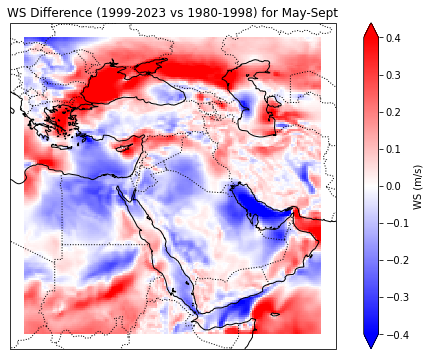

In [15]:
#plot the (1999-2023)-(1980-1998). This gives the anomalies which show how much these variables changed between the 2 periods.
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime

# 1. Load the NetCDF file
file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc'
data = xr.open_dataset(file_path)

# 2. Extract temperature data
temperature = data['WS']

# 3. Handle CFTimeIndex if applicable
time_data = temperature['time']
if isinstance(time_data.values[0], (cftime.DatetimeNoLeap, cftime.DatetimeGregorian)):
    # If the time is CFTime, convert to a standard CFTimeIndex
    temperature['time'] = xr.CFTimeIndex(time_data.values)

# 4. Select months May to September (5 to 9)
months_to_select = [5, 6, 7, 8, 9]
temperature_mjjas = temperature.sel(time=temperature['time.month'].isin(months_to_select))

# 5. Split the data into two periods: 1980-1998 and 1999-2023
# Period 1: 1980-1998
temperature_1980_1998 = temperature_mjjas.sel(time=slice('1980-01-01', '1998-12-31'))
temperature_mean_1980_1998 = temperature_1980_1998.mean(dim='time')

# Period 2: 1999-2023
temperature_1999_2023 = temperature_mjjas.sel(time=slice('1999-01-01', '2023-12-31'))
temperature_mean_1999_2023 = temperature_1999_2023.mean(dim='time')

# 6. Calculate the difference (anomaly) between the two periods
temperature_diff = temperature_mean_1999_2023 - temperature_mean_1980_1998

# 7. Plot the temperature difference on a geographical map
plt.figure(figsize=(10, 6))

# Set up the map with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature difference data on the map
temperature_diff.plot.pcolormesh(
    ax=ax,
    cmap='bwr',  # Color map for temperature anomalies
    transform=ccrs.PlateCarree(),  # Define the coordinate system
    vmin=-0.4,
    vmax=0.4,
    cbar_kwargs={'label': 'WS (m/s)'}  # Color bar label °C
)

# Add a title to the plot
plt.title('WS Difference (1999-2023 vs 1980-1998) for May-Sept')

#Save figure
plt.savefig('WS difference for (1999-2023)-(1980-1998)')

# Show the plot
plt.show()


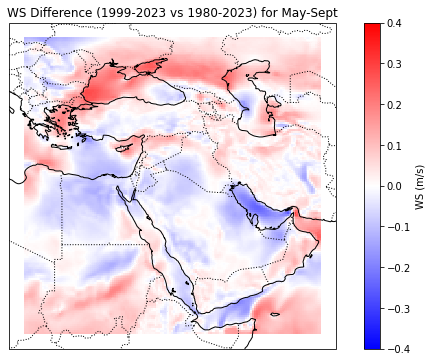

In [21]:
#plot the (1999-2023)-(1980-2023). This gives how much these variables differ from the long term mean.
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime

# 1. Load the NetCDF file
file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc'
data = xr.open_dataset(file_path)

# 2. Extract temperature data
temperature = data['WS']

# 3. Handle CFTimeIndex if applicable
time_data = temperature['time']
if isinstance(time_data.values[0], (cftime.DatetimeNoLeap, cftime.DatetimeGregorian)):
    # If the time is CFTime, convert to a standard CFTimeIndex
    temperature['time'] = xr.CFTimeIndex(time_data.values)

# 4. Select months May to September (5 to 9)
months_to_select = [5, 6, 7, 8, 9]
temperature_mjjas = temperature.sel(time=temperature['time.month'].isin(months_to_select))

# 5. Calculate the mean temperature for the period 1980-2023 (all years)
temperature_mean_1980_2023 = temperature_mjjas.sel(time=slice('1980-01-01', '2023-12-31')).mean(dim='time')

# 6. Calculate the mean temperature for the period 1999-2023
temperature_mean_1999_2023 = temperature_mjjas.sel(time=slice('1999-01-01', '2023-12-31')).mean(dim='time')

# 7. Calculate the difference (anomaly) between the two periods
temperature_diff = temperature_mean_1999_2023 - temperature_mean_1980_2023

# 8. Plot the temperature difference on a geographical map
plt.figure(figsize=(10, 6))

# Set up the map with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature difference data on the map
temperature_diff.plot.pcolormesh(
    ax=ax,
    cmap='bwr',  # Color map for temperature anomalies
    transform=ccrs.PlateCarree(),  # Define the coordinate system
    vmin=-0.4,
    vmax=0.4,
    cbar_kwargs={'label': 'WS (m/s)'}  # Color bar label (°C)
)

# Add a title to the plot
plt.title('WS Difference (1999-2023 vs 1980-2023) for May-Sept')

#Save figure
plt.savefig('WS difference for (1999-2023)-(1980-2023)')

# Show the plot
plt.show()


In [ ]:
#Positive phase event which might lead to high temperatures and drier air
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Load the NetCDF file
file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc'  # Replace with the actual file path
data = xr.open_dataset(file_path)

# 2. Extract temperature data
temperature = data['T']-273  # Replace 'temperature' with the correct variable name in your file

# 3. Select months May (5), June (6), July (7), August (8), September (9)
months_to_select = [5, 6, 7, 8, 9]
temperature_mjjas = temperature.sel(time=temperature['time.month'].isin(months_to_select))

# 4. List of specific years to average over
years_to_select = [1982, 1983, 1984, 1988, 1989, 1990, 1991, 1992, 1994, 1996, 1997, 1999, 
                   2000, 2002, 2003, 2004, 2013, 2018, 2022]

# 5. Select the specific years from the data
temperature_selected_years = temperature_mjjas.sel(time=temperature_mjjas['time.year'].isin(years_to_select))

# 6. Calculate the average temperature over the selected months and years
temperature_mean = temperature_selected_years.mean(dim='time')

# 7. Plot the averaged temperature data on a geographical map
plt.figure(figsize=(10, 6))

# Set up the map with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the average temperature on the map using pcolormesh
temperature_mean.plot.pcolormesh(
    ax=ax,
    cmap='jet',  # Colormap for temperature
    transform=ccrs.PlateCarree(),  # Specify that the data uses lat/lon coordinates
    vmin=15,
    vmax=40,
    cbar_kwargs={'label': 'Temperature (°C)'}  # Label for color bar
)

# Add a title to the plot
plt.title('Mean Temperature (May-Sept) for positive phases of event')

# Show the plot
plt.show()


In [ ]:
#NEGATIVE phase event which might lead to cooler and less dry summer
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Load the NetCDF file
file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc'  # Replace with the actual file path
data = xr.open_dataset(file_path)

# 2. Extract temperature data
temperature = data['T']-273  # Replace 'temperature' with the correct variable name in your file

# 3. Select months May (5), June (6), July (7), August (8), September (9)
months_to_select = [5, 6, 7, 8, 9]
temperature_mjjas = temperature.sel(time=temperature['time.month'].isin(months_to_select))

# 4. List of specific years to average over
years_to_select = [1980, 1981, 1985, 1986, 1987, 1993, 1995, 1998, 2001, 2005, 2006, 2007, 
                   2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2019, 2020, 2021, 2023]

# 5. Select the specific years from the data
temperature_selected_years = temperature_mjjas.sel(time=temperature_mjjas['time.year'].isin(years_to_select))

# 6. Calculate the average temperature over the selected months and years
temperature_mean = temperature_selected_years.mean(dim='time')

# 7. Plot the averaged temperature data on a geographical map
plt.figure(figsize=(10, 6))

# Set up the map with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the average temperature on the map using pcolormesh
temperature_mean.plot.pcolormesh(
    ax=ax,
    cmap='jet',  # Colormap for temperature
    transform=ccrs.PlateCarree(),  # Specify that the data uses lat/lon coordinates
    vmin=15,
    vmax=40,
    cbar_kwargs={'label': 'Temperature (°C)'}  # Label for color bar
)

# Add a title to the plot
plt.title('Mean Temperature (May-Sept) for negative phases of event')

# Show the plot
plt.show()


In [ ]:
#Find the average windspeed in the summer season for all the cities and all the years
import netCDF4 as nc
import numpy as np
import os
import pandas as pd

# Function to calculate average windspeed for selected months
def average_windspeed(file_path):
    dataset = nc.Dataset(file_path)
    
    # Extract variables (assuming time is in hours from a reference date)
    time_var = dataset.variables['time'][:]
    windspeed = dataset.variables['windspeed'][:]
    
    # Convert time to a pandas datetime index (assuming 'hours since' reference)
    time_units = dataset.variables['time'].units
    time_calendar = dataset.variables['time'].calendar if hasattr(dataset.variables['time'], 'calendar') else 'standard'
    dates = nc.num2date(time_var, units=time_units, calendar=time_calendar)
    
    # Create a pandas DataFrame for easier time filtering
    df = pd.DataFrame({'date': dates, 'windspeed': windspeed})
    df.set_index('date', inplace=True)
    
    # Filter data for the months of interest (May to September)
    df_filtered = df[(df.index.month >= 5) & (df.index.month <= 9)]
    
    # Calculate average windspeed
    avg_windspeed = df_filtered['windspeed'].mean()
    
    dataset.close()
    return avg_windspeed

# Directory where .nc files are located
directory = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5-UpdatedData/1980'

# List to store results for each file
results = []

# Loop over all .nc files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.nc'):
        file_path = os.path.join(directory, filename)
        avg_wind = average_windspeed(file_path)
        results.append({'city_file': filename, 'avg_windspeed': avg_wind})

# Convert results to a pandas DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
#positive and negative trend of results. Here I am just calculating th average temp, RH, and WS for each year alone to bin the negative and positive alone

import xarray as xr

import pandas as pd

 

# Load the dataset

file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc'  # replace with your file path

ds = xr.open_dataset(file_path)

 

# Define the months of interest

months = [5, 6, 7, 8, 9]

 

# Prepare a list to store results

results = []

 

# Loop over each year in the dataset

for year in range(1980, 2024):

    # Filter the dataset to include only data from the specific year and months of interest

    ds_filtered = ds.where((ds['time.year'] == year) & (ds['time.month'].isin(months)), drop=True)

   

    # Calculate the mean for each parameter over the time, latitude, and longitude dimensions

    avg_temp = ds_filtered['T'].mean(dim=['time', 'latitude', 'longitude']).values.item()

    avg_rh = ds_filtered['RH'].mean(dim=['time', 'latitude', 'longitude']).values.item()

    avg_ws = ds_filtered['WS'].mean(dim=['time', 'latitude', 'longitude']).values.item()

   

    # Append results for the current year

    results.append([year, avg_temp, avg_rh, avg_ws])

 

# Create a DataFrame to store the results

df = pd.DataFrame(results, columns=['Year', 'Average Temperature', 'Average RH', 'Average WS'])

 

# Save the results to an Excel file

output_file = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/average_climate_May_to_September.xlsx'

df.to_excel(output_file, index=False)

 

print("Calculation complete. Results saved to:", output_file)


In [ ]:
#plots generation of the negative trends of events
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

import cartopy.feature as cfeature

 

# Load the dataset

file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc'  # Replace with the path to your .nc file

ds = xr.open_dataset(file_path)

 

# Define the months and years of interest

months = [5, 6, 7, 8, 9]  # May to September

#years = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 2000, 2003, 2004] #T
#years = [1984, 1990, 2000, 2001, 2002, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021, 2022, 2023] #RH
years = [1980, 1981, 1982, 1983, 1986, 1987, 1988, 1989, 1992, 1993, 1995, 1997, 1998, 2002, 2004, 2010, 2012, 2015, 2019, 2020, 2023] #WS
 

# Filter the dataset for the selected years and months using .where()

ds_filtered = ds.where(ds['time.year'].isin(years) & ds['time.month'].isin(months), drop=True)

 

# Calculate the mean temperature over the selected months and years

avg_temp = ds_filtered['WS'].mean(dim='time')

 

# Plotting the map

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

avg_temp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', cbar_kwargs={'label': 'Average Temperature (°C)'}, vmin=0, vmax=5)

 

# Add geographic features

ax.add_feature(cfeature.COASTLINE)

ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.add_feature(cfeature.LAND, facecolor='lightgray')

ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

 

# Set the title and show the plot

ax.set_title('Average WS (negative phase)', fontsize=14)

plt.savefig('Average WS negative phase')
plt.show()

In [ ]:
#plots generation of the positive trends of events
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

import cartopy.feature as cfeature

 

# Load the dataset

file_path = '/media/Storage/ThermalComfortPaper_Jennyfer/ERA5_ReanalysisData/AverageMonths/AverageMonths_Updated.nc'  # Replace with the path to your .nc file

ds = xr.open_dataset(file_path)

 

# Define the months and years of interest

months = [5, 6, 7, 8, 9]  # May to September


#years = [1998, 1999, 2001, 2002, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023] #T
#years = [1980, 1981, 1982, 1983, 1985, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2003, 2005, 2016] #RH
years = [1984, 1985, 1990, 1991, 1994, 1996, 1999, 2000, 2001, 2003, 2005, 2006, 2007, 2008, 2009, 2011, 2013, 2014, 2016, 2017, 2018, 2021, 2022] #WS
 

# Filter the dataset for the selected years and months using .where()

ds_filtered = ds.where(ds['time.year'].isin(years) & ds['time.month'].isin(months), drop=True)

 

# Calculate the mean temperature over the selected months and years

avg_temp = ds_filtered['WS'].mean(dim='time')

 

# Plotting the map

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

avg_temp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', cbar_kwargs={'label': 'Average Temperature (°C)'}, vmin=0, vmax=5)

 

# Add geographic features

ax.add_feature(cfeature.COASTLINE)

ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.add_feature(cfeature.LAND, facecolor='lightgray')

ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

 

# Set the title and show the plot

ax.set_title('Average WS (positive phase)', fontsize=14)

plt.savefig('Average WS positive phase')
plt.show()